Filename: _5_xg_boost.ipynb <br>
Title: XG Boost model building <br>
Author: Raghava | GitHub: @raghavtwenty <br>
Date Created: June 10, 2023 | Last Updated: May 13, 2024 <br>
Language: Python | Version: 3.10.14, 64-bit <br>

Importing Required Libraries


In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from _1_confus_mat_display import display_confus_matrix

Importing Preprocessed Dataset


In [2]:
data_frame = pd.read_csv("../datasets/cleaned_dataset.csv")

Train Test split


In [3]:
X = data_frame.drop(columns=["Label"])
y = data_frame["Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

XGBoost classifier

In [4]:
xgb_classifier = xgb.XGBClassifier()

# Hyperparameters
parameters = {
    "max_depth": [3, 5, 7],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.2, 0.3],
    "subsample": [0.8, 0.9, 1.0],
    "learning_rate": [0.1, 0.01, 0.001],
}

# Grid search
grid_search_xbg = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=parameters,
    cv=5,
    scoring="accuracy",
)

grid_search_xbg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2, 0.3],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

Train again with best parameters


In [5]:
best_params_xgb = grid_search_xbg.best_params_
best_xgb_classifier = xgb.XGBClassifier(**best_params_xgb)
best_xgb_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_xgb = best_xgb_classifier.predict(X_test)

Classification Metrics


In [6]:
classifi_report = classification_report(y_test, y_pred_xgb)
print(classifi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       0.97      0.97      0.97       119
           2       0.89      0.91      0.90       148
           3       0.88      0.90      0.89       134
           4       0.98      0.92      0.95        64

    accuracy                           0.94       586
   macro avg       0.95      0.94      0.94       586
weighted avg       0.94      0.94      0.94       586



Confusion Matrix


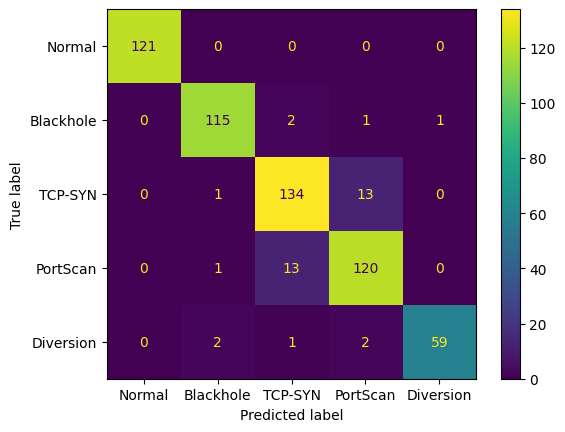

In [7]:
display_confus_matrix(y_test, y_pred_xgb)

Evaluating accuracy

In [8]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

print("Best Hyperparameters:")
for key, value in best_params_xgb.items():
    print(key, ":", value)

XGBoost Accuracy: 0.9369
Best Hyperparameters:
gamma : 0
learning_rate : 0.1
max_depth : 7
min_child_weight : 1
subsample : 0.9


Save the model

In [9]:
best_xgb_classifier.save_model("../models/m3_xg_boost.model")

/Users/raghav/miniconda3/envs/ids/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


Test data for each category with new user input

In [1]:
l0_x = [[4, 350188, 14877116, 101354648, 159524, 2910, 278, 280, 5, 4, 0, 6, 667324]]

l1_x = [[2, 2326, 12856942, 31777516, 2998, 2497, 560, 560, 5, 2, 0, 4, 7259]]

l2_x = [[4, 150, 19774, 6475473, 3054, 166, 556, 6068, 5, 4, 502, 6, 7418]]

l3_x = [[2, 209, 20671, 6316631, 274, 96, 3527, 2757949, 5, 2, 183877, 8, 90494]]

l4_x = [[2, 1733, 37865130, 38063670, 3187, 2152, 0, 556, 5, 3, 0, 4, 14864]]

New input prediction

In [7]:
# Importing required libraries
import numpy as np
import xgboost as xgb
from joblib import load
from _2_scale_transform import transform_new_input

# Load the model
model = xgb.Booster()
model.load_model("../models/m3_xg_boost.model")

# Preprocessing input
user_input = np.array(l2_x)  # Change values and try changing "l2_x"
user_input = transform_new_input(user_input)
user_input = xgb.DMatrix(user_input)

# Prediction
predict = model.predict(user_input)

# Final Show
print(f"Predicted label: {np.argmax(predict)}")

Predicted label: 2
